<a href="https://colab.research.google.com/github/Minalva/python-for-DATA-LOVE/blob/main/Copy_of_HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/sample_data/yulu_rental.csv')

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
print(df.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [23]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [35]:
print(df.head())
print(df.info())
print(df.describe())
print(f'Кількість рядків: {df.shape[0]}')
print(f'Кількість стовпців: {df.shape[1]}')

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


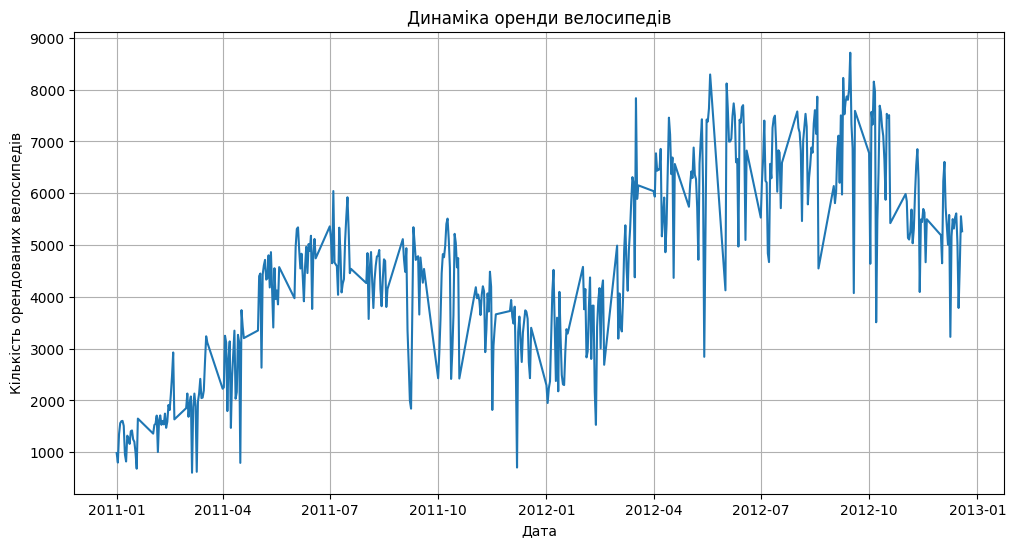

In [25]:
count_by_date = df.groupby('date')['count'].sum()
count_by_date.plot(figsize=(12, 6))
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Дата')
plt.ylabel('Кількість орендованих велосипедів')
plt.grid(True)
plt.show()

<Axes: xlabel='date'>

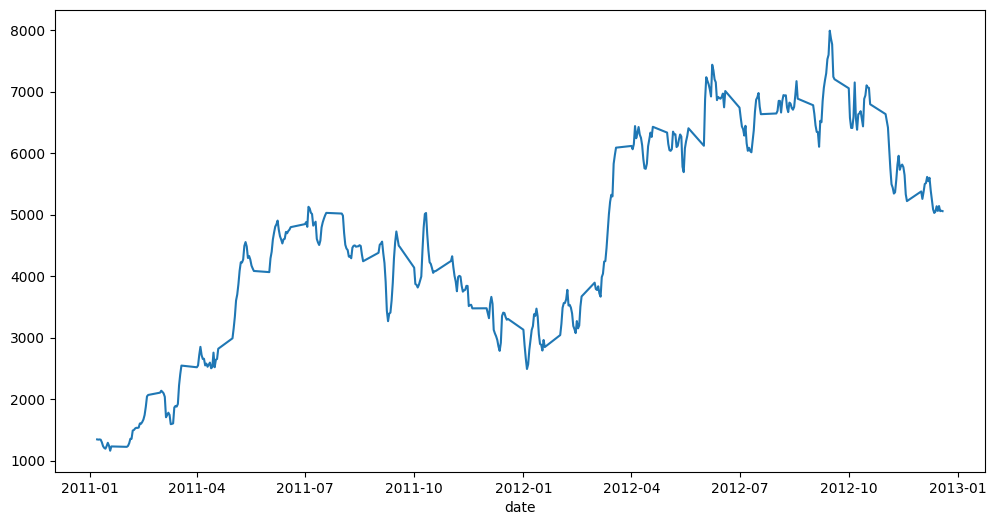

In [26]:
count_by_date.rolling(window=7).mean().plot(figsize=(12, 6))

Попит росте з роками
в сезон рост


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

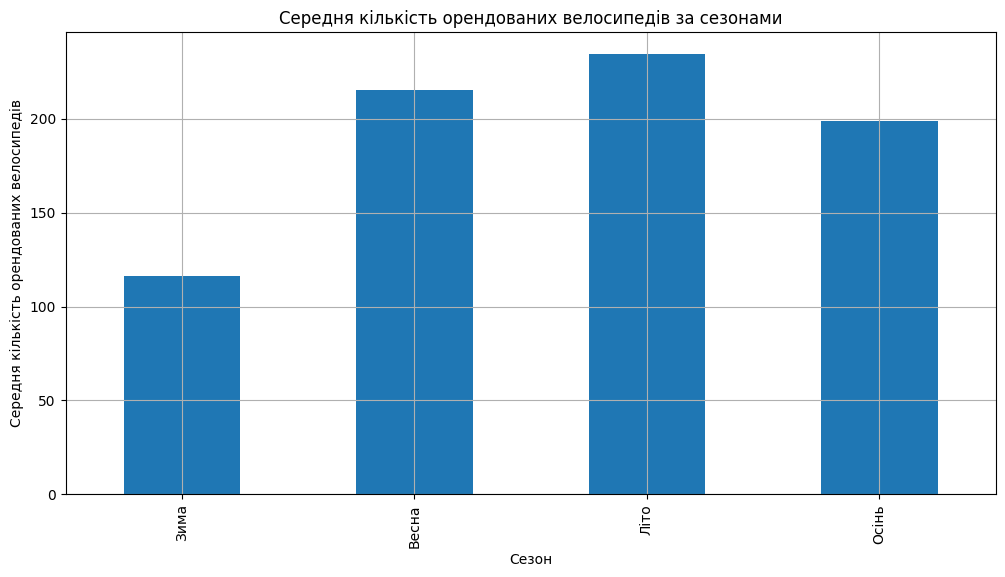

In [27]:

count_by_season = df.groupby('season')['count'].mean()
season_names = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
count_by_season.index = count_by_season.index.map(season_names)
count_by_season.plot(kind='bar', figsize=(12, 6))
plt.title('Середня кількість орендованих велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість орендованих велосипедів')
plt.grid(True)
plt.show()

1 лето
2 погода
3 1.5-2 рази


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


<Axes: xlabel='month'>

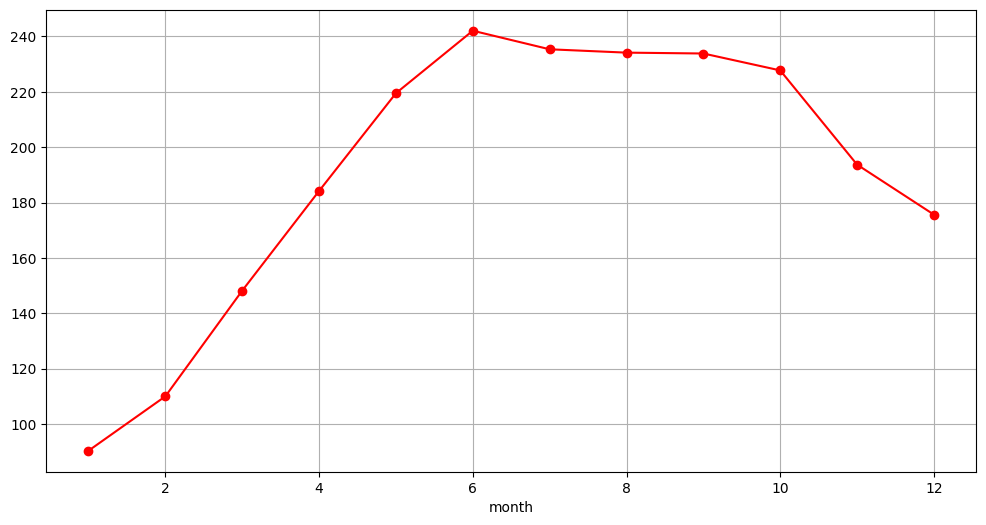

In [28]:

count_by_month = df.groupby('month')['count'].mean()
count_by_month.plot(kind='line', figsize=(12, 6), marker='o', linestyle='-', color='red', grid=True)

1. В які місяці спостерігається пік та спад оренди? 6, 12
2. Чи збігається ця закономірність з результатами з попереднього завдання? да, пик 6 мес, спад зима



## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

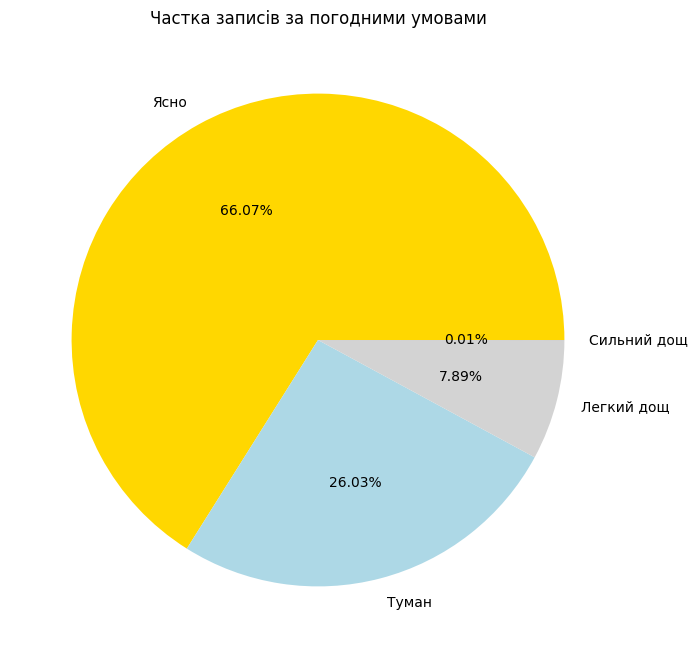

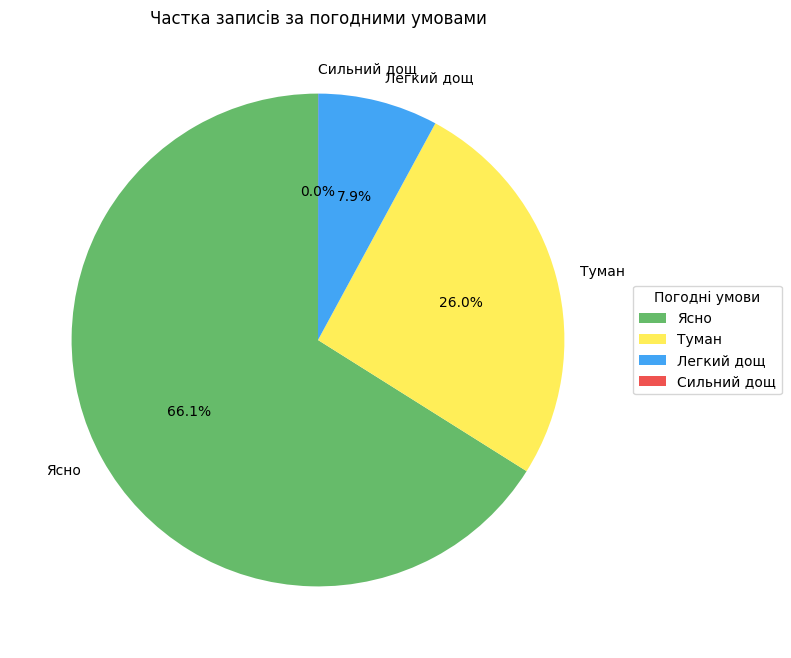

In [29]:
weather_counts = df['weather'].value_counts().sort_index()

weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

# Map numerical weather codes to descriptive labels
weather_counts.index = weather_counts.index.map(weather_labels)

# Define custom colors
colors = ['#66bb6a', '#ffee58', '#42a5f5', '#ef5350'] # Green, Yellow, Blue, Red for Clear, Fog, Light Rain, Heavy Rain

plt.figure(figsize=(8, 8))
weather_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Частка записів за погодними умовами')
plt.ylabel('') # Hide the default 'count' label from the pie chart
plt.legend(weather_counts.index, title="Погодні умови", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

<Figure size 1000x600 with 0 Axes>

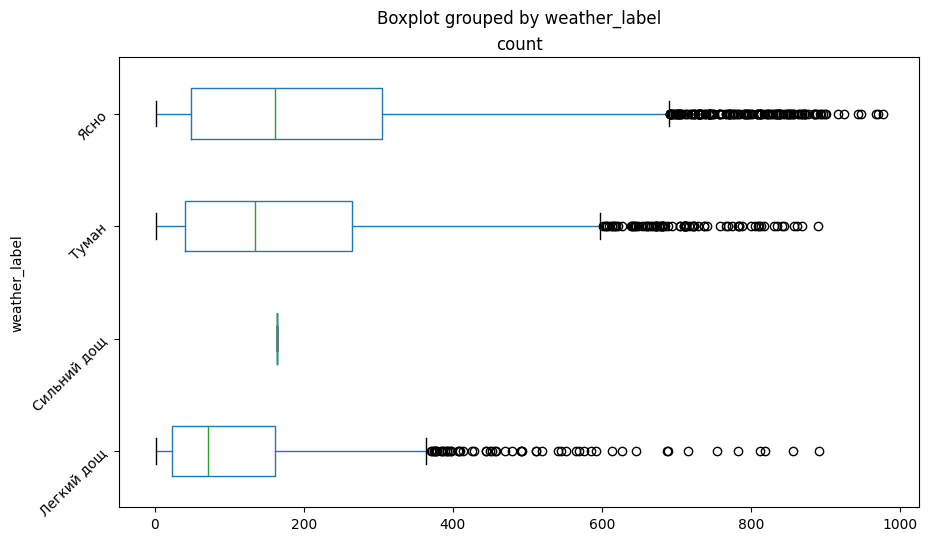

In [52]:
df_plot=df.copy()
df_plot['weather_label']=df_plot['weather'].map(weather_labels)
plt.figure(figsize=(10, 6))
df_plot.boxplot(
    column='count',
    by='weather_label',
    grid=False,
    rot=45,
    vert=False,
    figsize=(10, 6)
    )
plt.show()





## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

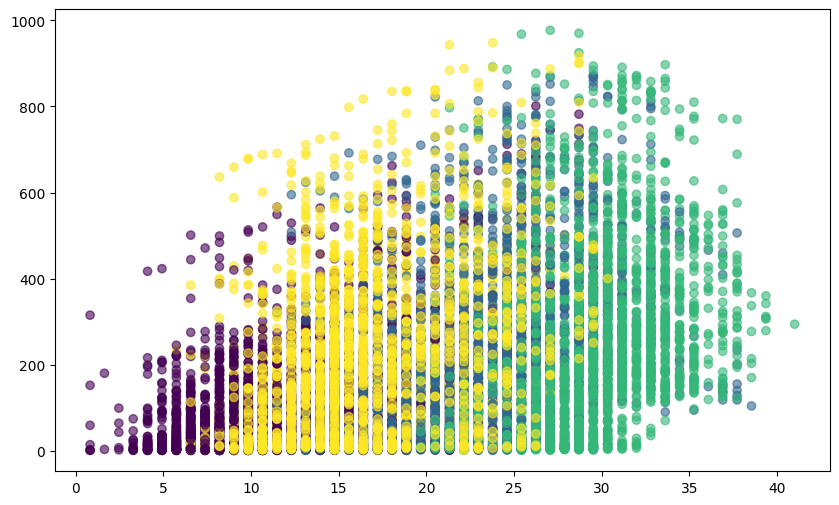

In [54]:
temp = df['temp']
count = df['count']
season = df['season']
plt.figure(figsize=(10, 6))
plt.scatter(temp, count, c=season, alpha=0.6)
alpha = 0.6

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?